In [13]:
from math import sqrt
import matplotlib

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    #MAX_HEIGHT_INCHES = 10
    #if fig_height > MAX_HEIGHT_INCHES:
    #    print("WARNING: fig_height too large:" + fig_height + 
    #          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    #    fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 12, # fontsize for x and y labels (was 12)
              'axes.titlesize': 12,
              'text.fontsize': 12, # was 12
              'legend.fontsize': 12, # was 12
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)
latexify(fig_width=7)

/home/sieben/.local/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


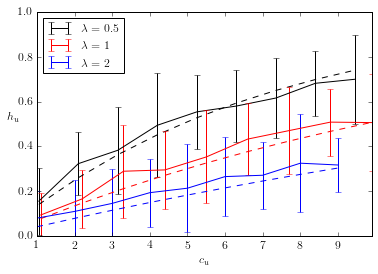

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
fig = plt.figure()
df_05 = pd.read_csv("cache_lambda0.5.csv")
df_05["lambda"] = 0.5
df_05.set_index("cacheTime", inplace=True)
ax = df_05["cacheHitMean"].plot(color="k", yerr=df_05.cacheHitSigma, label="$\lambda = 0.5$")
df_05["model"].plot(color="k", ax=ax, linestyle="--", label="_nolegend_")

df_1 = pd.read_csv("cache_lambda1.csv")
df_1["lambda"] = 1
df_1.set_index("cacheTime", inplace=True)
df_1["cacheHitMean"].plot(color="r", ax=ax, yerr=df_1.cacheHitSigma, label="$\lambda = 1$")
df_1["model"].plot(color="r", ax=ax, linestyle="--", label="_nolegend_")

df_2 = pd.read_csv("cache_lambda2.csv")
df_2["lambda"] = 2
df_2.set_index("cacheTime", inplace=True)
df_2["cacheHitMean"].plot(color="b", ax=ax, yerr=df_2.cacheHitSigma, label='$\lambda = 2$')
df_2["model"].plot(color="b", ax=ax, linestyle="--", label="_nolegend_")
ax.set_ylim((0, 1))
ax.set_xlabel("$c_u$")
ax.set_ylabel("$h_u$", rotation=0)
ax.legend(loc="best")

fig.savefig("new_cachinghit.pdf", bbox_inches='tight')